<a href="https://colab.research.google.com/github/sachin032/Tensorflow/blob/master/Exercise-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Download Dependencies**

In [0]:
try:
    !pip install -q tf-nightly-gpu-2.0-preview fuzzywuzzy metaphone whoosh jellyfish
except Exception:
    pass

In [159]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU Device not Found')
print('Found gpu at: {} '.format(device_name))

Found gpu at: /device:GPU:0 


# **Enviornment information**

In [160]:
!cat /proc/cpuinfo
!cat /proc/meminfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits 

In [161]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15451876102251114208, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8455144424800597646
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 872401612097353158
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15956161332
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4331952492529341421
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

# **Data collection**

In [163]:
from google.colab import files
data =  files.upload()

Saving BigData.csv to BigData (4).csv


In [0]:
df = pd.read_csv(io.StringIO(data['BigData.csv'].decode('utf-8')))

df['system_universalbusinessnumber_11'] = df[
    'system_universalbusinessnumber_11'].astype(str)

df['system_universalbusinessnumber_12'] = df[
    'system_universalbusinessnumber_11'].astype(str)

In [0]:
algos = {
    'jaro_winkler': [],
    'exact_match': [],
    'overlapLevenshtein': [
        'system_businessname', 'system_address', 'system_alternatename',
        'system_phonenumber', 'system_universalbusinessnumber'
    ],
    'soundex': ['system_businessname', 'system_alternatename']
}

cols = [
    'id', 'system_businessname_1', 'system_businessname_2',
    'system_alternatename_3', 'system_alternatename_4', 'system_address_5',
    'system_address_6', 'system_phonenumber_7', 'system_phonenumber_8',
    'system_dateofinception_9', 'system_dateofinception_10',
    'system_universalbusinessnumber_11', 'system_universalbusinessnumber_12',
    'LABEL'
]

# **EDA**

In [169]:
df.head()

,id,system_businessname_1,system_businessname_2,system_alternatename_3,system_alternatename_4,system_address_5,system_address_6,system_phonenumber_7,system_phonenumber_8,system_dateofinception_9,system_dateofinception_10,system_universalbusinessnumber_11,system_universalbusinessnumber_12,LABEL
0,6312788757,Eliazea,eliza,Xecbb,Wpvmbb,Nhbl8 Epar K364 4Tamb Ostreet,Toble Park 3644 Tambo Styreet,07 46480455,00 75444804551,19340621,193401621,72814554,72814554,1
1,706559436,Elizai,eliza,Whebbx,Wpbb,Nobli Pepa Rk36 44Tam Bostreet,Voble Park 3D44 Tambo Street,07 46480455,07 864804515,193407621,193406421,7268165,7268165,1
2,3964423617,Klizza,Eslijza,Oewpvb,webb,Noble Park 364Z 4Tamb Ostreet,noble park 3644 tambo street,07 46480455,02 461480455,129940621,194621,72281654,72281654,1
3,1294140672,Jehsliza,Elmzoa,Tlba,Zwedb,Noble Par2 K364 4Tamb Osurbetx,Ioble Park 3644 Tambo Street,07 46480255,07 464804535,10940661,16340621,325116854,325116854,0
4,7173832644,Elizab,Cliza,Wwedbb,Wzuabb,noble park 3644 tambo street,noble park 3644 tambo street,30 446480455,07 464804565,10340628,29340621,7281654,7281654,1


In [0]:
featured_df = applyAlgorithms(dataframe=df, algorithms=algos, column_list=cols)
df = featured_df[0]

In [171]:
df.head()

,id,system_businessname_1,system_businessname_2,system_alternatename_3,system_alternatename_4,system_address_5,system_address_6,system_phonenumber_7,system_phonenumber_8,system_dateofinception_9,system_dateofinception_10,system_universalbusinessnumber_11,system_universalbusinessnumber_12,LABEL,system_address_14,system_alternatename_15,system_businessname_16,system_phonenumber_17,system_universalbusinessnumber_18,system_alternatename_19,system_businessname_20
0,6312788757,Eliazea,eliza,Xecbb,Wpvmbb,Nhbl8 Epar K364 4Tamb Ostreet,Toble Park 3644 Tambo Styreet,07 46480455,00 75444804551,19340621,193401621,72814554,72814554,1,0.000000,0.0,0.000000,0.000000,1.0,0.0,1.0
1,706559436,Elizai,eliza,Whebbx,Wpbb,Nobli Pepa Rk36 44Tam Bostreet,Voble Park 3D44 Tambo Street,07 46480455,07 864804515,193407621,193406421,7268165,7268165,1,0.000000,0.0,0.833333,0.888889,1.0,0.0,1.0
2,3964423617,Klizza,Eslijza,Oewpvb,webb,Noble Park 364Z 4Tamb Ostreet,noble park 3644 tambo street,07 46480455,02 461480455,129940621,194621,72281654,72281654,1,0.571429,0.0,0.000000,0.444444,1.0,0.0,0.0
3,1294140672,Jehsliza,Elmzoa,Tlba,Zwedb,Noble Par2 K364 4Tamb Osurbetx,Ioble Park 3644 Tambo Street,07 46480255,07 464804535,10940661,16340621,325116854,325116854,0,0.160000,0.0,0.000000,0.888889,1.0,0.0,0.0
4,7173832644,Elizab,Cliza,Wwedbb,Wzuabb,noble park 3644 tambo street,noble park 3644 tambo street,30 446480455,07 464804565,10340628,29340621,7281654,7281654,1,1.000000,0.0,0.000000,0.388889,1.0,0.0,0.0


In [0]:
train_df = df[[
    'system_address_14', 'system_alternatename_15', 'system_businessname_16',
    'system_phonenumber_17', 'system_universalbusinessnumber_18',
    'system_alternatename_19', 'system_businessname_20', 'LABEL'
]]

In [176]:
train_df.head()

,system_address_14,system_alternatename_15,system_businessname_16,system_phonenumber_17,system_universalbusinessnumber_18,system_alternatename_19,system_businessname_20,LABEL
0,0.000000,0.0,0.000000,0.000000,1.0,0.0,1.0,1
1,0.000000,0.0,0.833333,0.888889,1.0,0.0,1.0,1
2,0.571429,0.0,0.000000,0.444444,1.0,0.0,0.0,1
3,0.160000,0.0,0.000000,0.888889,1.0,0.0,0.0,0
4,1.000000,0.0,0.000000,0.388889,1.0,0.0,0.0,1


In [177]:
train_df.describe()

,system_address_14,system_alternatename_15,system_businessname_16,system_phonenumber_17,system_universalbusinessnumber_18,system_alternatename_19,system_businessname_20,LABEL
count,36823.000000,36823.000000,36823.000000,36823.000000,36823.0,36823.000000,36823.000000,36823.000000
mean,0.520517,0.110169,0.236426,0.425443,1.0,0.116476,0.189202,0.733971
std,0.325534,0.293836,0.391505,0.354861,0.0,0.320799,0.391675,0.441886
min,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,0.200000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
50%,0.560000,0.000000,0.000000,0.500000,1.0,0.000000,0.000000,1.000000
75%,0.800000,0.000000,0.800000,0.500000,1.0,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000


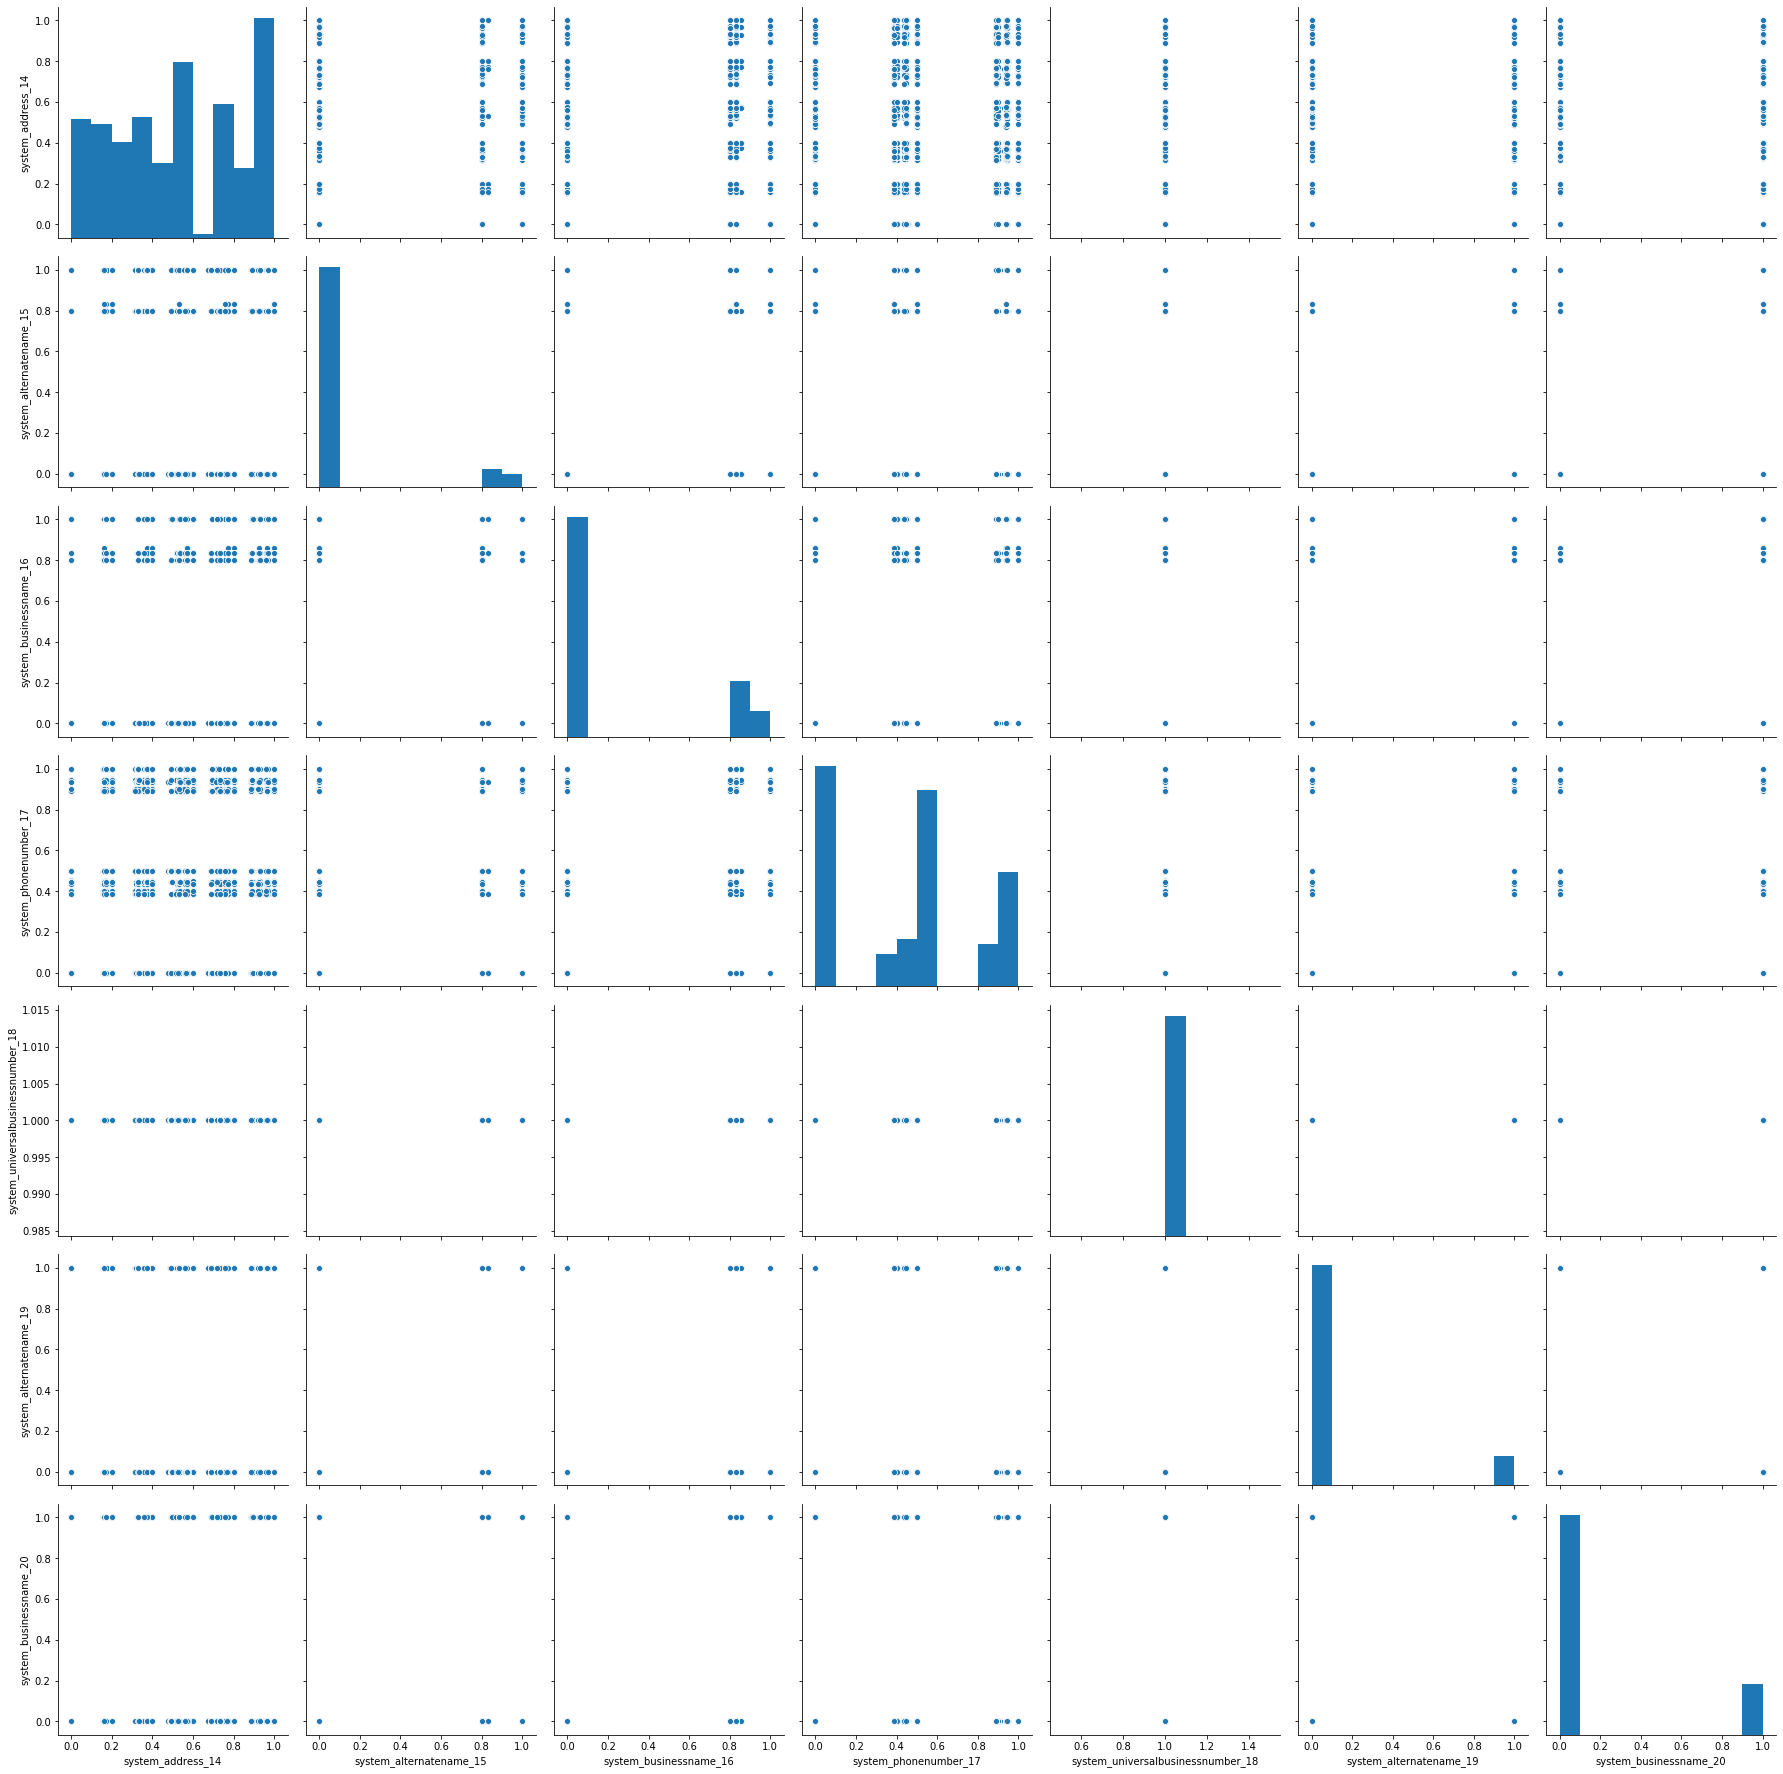

In [182]:
sns.pairplot(train_df, height=3.5)

In [0]:
target = train_df.pop("LABEL")
dataset = tf.data.Dataset.from_tensor_slices((train_df.values, target.values))

# **Import Dependencies**

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import io
import pathlib
from tensorflow.keras.preprocessing.text import Tokenizer,hashing_trick,one_hot,text_to_word_sequence

from jellyfish import jaro_winkler, levenshtein_distance, soundex
from whoosh.analysis import StandardAnalyzer
from metaphone import doublemetaphone
from fuzzywuzzy import fuzz

# **Custom Functions**

In [0]:
def tokenize(text):
    analyzer = StandardAnalyzer()
    return [t.text for t in analyzer(text)]


def overlap(A, B):
    try:
        if A is None or B is None or len(A) == 0 or len(B) == 0:
            return 0.0
        setA = tokenize(A)
        setB = tokenize(B)
        num_intersection = setA.intersection(setB)
        min_len = len(setA)
        if (min_len > len(setB)):
            min_len = len(setB)
        return float(intersection) / min_len
    except:
        pass


def jaccard(A, B):
    if A is None or B is None or len(A) == 0 or len(B) == 0:
        return 0.0
    setA = tokenize(A)
    setB = tokenize(B)
    num_intersection = setA.intersection(setB)
    return float(intersection) / (len(setA) + len(setB) - intersection)


def overlap_levenshtein(A, B):
    try:
        if A is None or B is None or len(A) == 0 or len(B) == 0:
            return 0.0
        setA = set(tokenize(A))
        setB = set(tokenize(B))
        num_intersection = len(setA.intersection(setB))
        max_dist = 0
        for wordA in setA:
            max_dist = 0
            for wordB in setB:
                if wordA not in list(
                        setA.intersection(setB)) and wordB not in list(
                            setA.intersection(setB)):
                    dist = levenshtein_distance_metric(wordA, wordB)
                    if dist > max_dist and dist > 0.75:
                        max_dist = dist
            num_intersection = num_intersection + max_dist
        min_len = len(setA)
        if (min_len > len(setB)):
            min_len = len(setB)
        if min_len == 0:
            return 0.0
        return float(num_intersection) / min_len
    except:
        pass


def jaccard_levenshtein(A, B):
    if A is None or B is None or len(A) == 0 or len(B) == 0:
        return 0.0
    setA = tokenize(A)
    setB = tokenize(B)
    num_intersection = len(setA.intersection(setB))
    for wordA in setA:
        max_dist = 0
        for wordB in setB:
            if wordB not in setA.intersection(setB):
                dist = levenshtein_distance_metric(wordA, wordB)
                if dist > max_dist and max_dist > 0.75:
                    max_dist = dist
            num_intersection = num_intersection + max_dist
    return float(num_intersection) / (len(setA) + len(setB) - num_intersection)


def levenshtein_distance_metric(A, B):
    try:
        if A is None or B is None or len(A) == 0 or len(B) == 0:
            return 0.0
        max_len = len(A)
        if max_len < len(B):
            max_len = len(B)
        return 1 - float(levenshtein_distance(A, B)) / max_len
    except:
        pass


def jaro_winkler_metric(A, B):
    if A is None or B is None or len(A) == 0 or len(B) == 0:
        return 0.0

    return float(jaro_winkler(A.lower(), B.lower()))


def exact_metric(A, B):
    if A is None or B is None:
        return 0.0
    if A == B:
        return 0.25
    else:
        return 0.0


def overlap_levenshtein(A, B):
    try:
        if A is None or B is None or len(A) == 0 or len(B) == 0:
            return 0.0
        setA = set(tokenize(A))
        setB = set(tokenize(B))
        num_intersection = len(setA.intersection(setB))
        intersected_word = list(setA.intersection(setB))
        max_dist = 0
        for wordA in setA:
            max_dist = 0
            for wordB in setB:
                if wordA not in intersected_word and wordB not in intersected_word:
                    dist = levenshtein_distance_metric(wordA, wordB)
                    if dist > max_dist and dist > 0.75:
                        max_dist = dist
            num_intersection = num_intersection + max_dist
        min_len = len(setA)
        if (min_len > len(setB)):
            min_len = len(setB)
        if min_len == 0:
            return 0.0
        return float(num_intersection) / min_len
    except Exception:
        pass


def soundex_metric(A, B):
    try:
        if A is None or B is None or A is "" or B is "" or len(A) == 0 or len(
                B) == 0:
            return 0.0

        setA = tokenize(A)
        setB = tokenize(B)
        soundexA = set()
        soundexB = set()
        for wordA in setA:
            soundexA.add(soundex(wordA))

        for wordB in setB:
            soundexB.add(soundex(wordB))

        intersection = 0
        for wordA in soundexA:
            if wordA in soundexB:
                intersection = intersection + 1

        min_len = len(soundexA)
        if min_len > len(soundexB):
            min_len = len(soundexB)
        if min_len == 0.0:
            return 0.0

        return float(intersection) / (min_len)
    except:
        pass


def swapped_attribute(fir, sec, pair_of_header, func, header_index):
    combinations = [(0, 0), (0, 1), (1, 0), (1, 1)]
    metric_values = list()
    for each_combination in combinations:
        metric_values.append(
            func(fir[header_index[pair_of_header[each_combination[0]]]],
                 sec[header_index[pair_of_header[each_combination[1]]]]))
    swp_1 = metric_values[0] + metric_values[3]
    swp_2 = metric_values[1] + metric_values[2]
    if swp_1 > swp_2:
        return metric_values[0], metric_values[3]
    else:
        return metric_values[1], metric_values[2]




# **Feature Engineering**

In [0]:
def applyAlgorithms(dataframe, algorithms, column_list):
    counter = 0
    column_length = len(column_list)
    for key, values_list in algorithms.items():
        values_list.sort()
        if key == LEVENSHTEIN:
            for value in values_list:
                column_name_list = [
                    column_name for column_name in column_list
                    if value in column_name
                ]
                col_name = value + "_" + str(column_length + counter)
                df[col_name] = df.apply(
                    lambda row: levenshtein_distance_metric(
                        row['%s' % column_name_list[0]], row[
                            '%s' % column_name_list[1]]),
                    axis=1)
                # dataframe = dataframe.withColumn("feature_"+str(column_length+counter), apply_levenshtein(column_name_list[0], column_name_list[1]))
                counter = counter + 1

        elif key == SOUNDEX:
            for value in values_list:
                column_name_list = [
                    column_name for column_name in column_list
                    if value in column_name
                ]
                col_name = value + "_" + str(column_length + counter)
                df[col_name] = df.apply(
                    lambda row: soundex_metric(row['%s' % column_name_list[
                        0]], row['%s' % column_name_list[1]]),
                    axis=1)
                # dataframe = dataframe.withColumn("feature_"+str(column_length+counter), apply_soundex(column_name_list[0], column_name_list[1]))
                counter = counter + 1

        elif key == OVERLAP:
            for value in values_list:
                column_name_list = [
                    column_name for column_name in column_list
                    if value in column_name
                ]
                col_name = value + "_" + str(column_length + counter)
                df[col_name] = df.apply(
                    lambda row: overlap(row['%s' % column_name_list[0]], row[
                        '%s' % column_name_list[1]]),
                    axis=1)
                # dataframe = dataframe.withColumn("feature_"+str(column_length+counter), apply_overlap(column_name_list[0], column_name_list[1]))
                counter = counter + 1

        elif key == OVERLAPLEVENSHTEIN:
            for value in values_list:
                column_name_list = [
                    column_name for column_name in column_list
                    if value in column_name
                ]
                col_name = value + "_" + str(column_length + counter)
                df[col_name] = df.apply(lambda row: overlap_levenshtein(
                    row['%s' % column_name_list[0]], row['%s' %
                                                         column_name_list[1]]),
                                        axis=1)
                # dataframe = dataframe.withColumn("feature_"+str(column_length+counter), apply_overlap_levenshtein(column_name_list[0], column_name_list[1]))
                counter = counter + 1

        elif key == JACCARD:
            for value in values_list:
                column_name_list = [
                    column_name for column_name in column_list
                    if value in column_name
                ]
                col_name = value + "_" + str(column_length + counter)
                df[col_name] = df.apply(
                    lambda row: jaccard(row['%s' % column_name_list[0]], row[
                        '%s' % column_name_list[1]]),
                    axis=1)
                # dataframe = dataframe.withColumn("feature_"+str(column_length+counter), apply_jaccard(column_name_list[0], column_name_list[1]))
                counter = counter + 1

        if key == JACCARDLEVENSHTEIN:
            for value in values_list:
                column_name_list = [
                    column_name for column_name in column_list
                    if value in column_name
                ]
                col_name = value + "_" + str(column_length + counter)
                df[col_name] = df.apply(lambda row: jaccard_levenshtein(
                    row['%s' % column_name_list[0]], row['%s' %
                                                         column_name_list[1]]),
                                        axis=1)
                # dataframe = dataframe.withColumn("feature_"+str(column_length+counter), apply_jaccard_levenshtein(column_name_list[0], column_name_list[1]))
                counter = counter + 1

    return dataframe, counter

# **Taxonomy Declaration**

In [0]:
ACCOUNT_NAME = 'accountName'
ACCOUNT_KEY = 'accountKey'
CONTAINER_NAME = 'containerName'
ANALYTICS_EXTERNAL = 'analytics-external'
BLOB_END_SUFFIX = ".blob.core.windows.net"
BLOB_PREFIX = "fs.azure.account.key."
ANALYTICS_INTERNAL = 'analytics-internal'
LEVENSHTEIN = 'levenshtein'
SOUNDEX = 'soundex'
OVERLAP = 'overlap'
OVERLAPLEVENSHTEIN = 'overlapLevenshtein'
JACCARD = 'jaccard'
JACCARDLEVENSHTEIN = 'jaccardLevenshtein'

# **Model Building**

In [0]:
import tensorflow as tf
from keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorboardcolab import TensorBoardColabCallback

In [0]:
DATASET_SIZE = len(df)

In [0]:
train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

In [0]:
full_dataset = dataset.shuffle(len(df)).batch(1)
train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)
val_dataset = test_dataset.skip(val_size)
test_dataset = test_dataset.take(test_size)

In [0]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.99):
            print(
                "\n\n\nAchieved accuracy above 99% so halting any further training!\nas it might cause Overfitting\n\n"
            )
            self.model.stop_training = True

callback = myCallback()

In [0]:
from tensorflow.keras.optimizers import RMSprop
tf.keras.backend.set_floatx('float64')

#Model 6H8N 
def get_compiled_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=RMSprop(lr=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'],
                  verbose=1,
                  callbacks = [callback]
                  ) 
    
    return model

In [146]:
model = get_compiled_model()
model_history = model.fit(x=train_dataset,
                    validation_data=val_dataset ,
                    epochs=20)

Epoch 1/20
25776/25776 [==============================] - 157s 6ms/step - loss: 0.4389 - accuracy: 0.7749 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/20
25776/25776 [==============================] - 103s 4ms/step - loss: 0.4589 - accuracy: 0.7714 - val_loss: 0.6416 - val_accuracy: 0.7753
Epoch 3/20
25776/25776 [==============================] - 101s 4ms/step - loss: 0.4789 - accuracy: 0.7647 - val_loss: 0.9715 - val_accuracy: 0.7737
Epoch 4/20
25776/25776 [==============================] - 99s 4ms/step - loss: 0.4809 - accuracy: 0.7689 - val_loss: 0.4434 - val_accuracy: 0.7592
Epoch 5/20
25776/25776 [==============================] - 102s 4ms/step - loss: 0.4750 - accuracy: 0.7688 - val_loss: 0.4306 - val_accuracy: 0.7663
Epoch 6/20
25776/25776 [==============================] - 101s 4ms/step - loss: 0.4588 - accuracy: 0.7750 - val_loss: 0.4404 - val_accuracy: 0.7858
Epoch 7/20
25776/25776 [==============================] - 101s 4ms/step - loss: 0.4718 - accuracy: 0.7772

In [0]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epochs = range(len(acc))

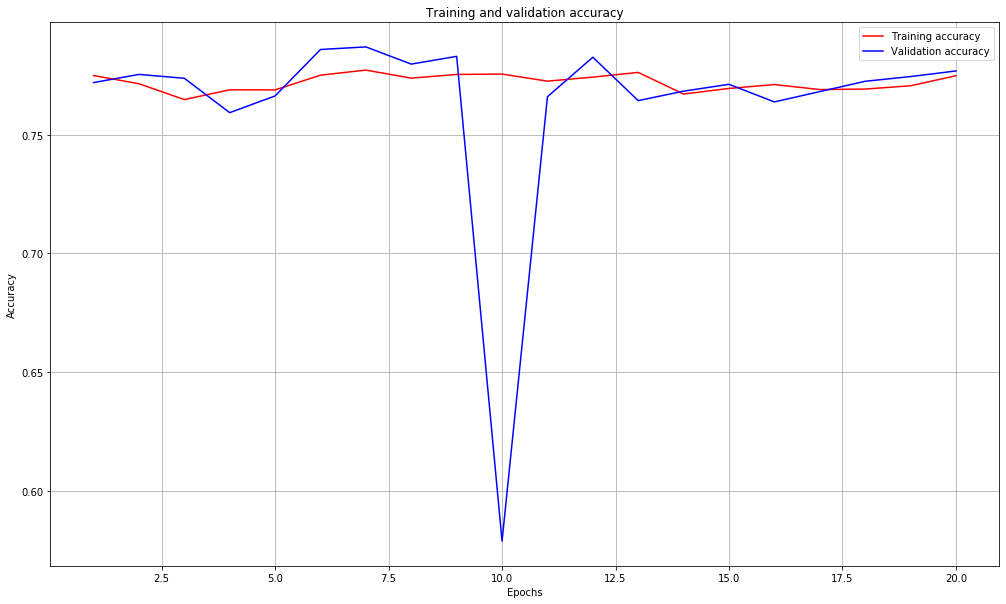

In [148]:
plt.figure(figsize=(17,10))
plt.plot(range(1,21), acc, 'r', label='Training accuracy')
plt.plot(range(1,21), val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.grid()
plt.show()

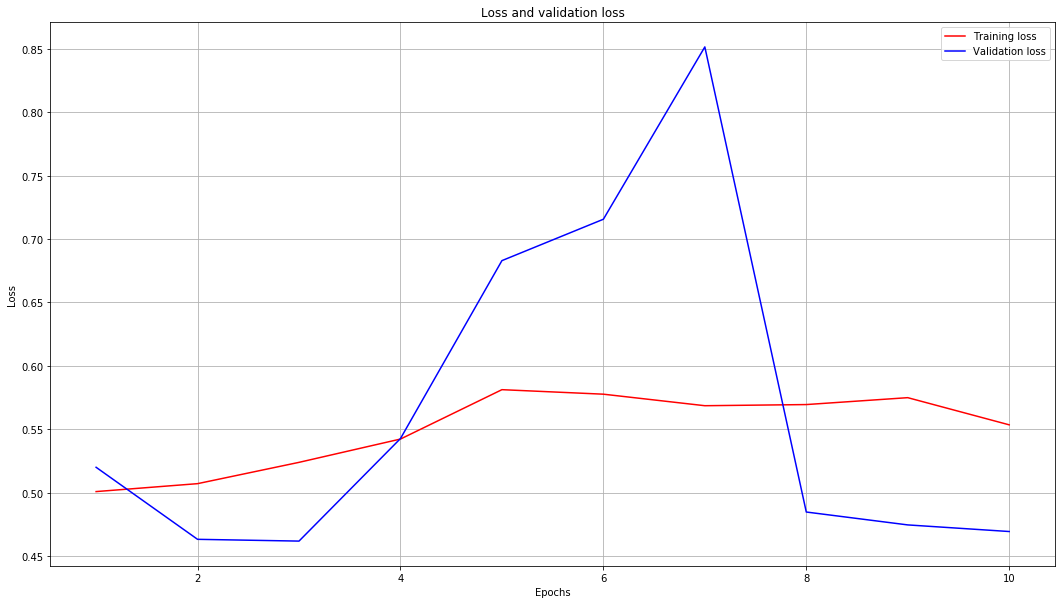

In [150]:

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(18,10))
plt.plot(range(1,11), loss, 'r', label='Training loss')
plt.plot(range(1,11), val_loss, 'b', label='Validation loss')
plt.title('Loss and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=1)
plt.grid()
plt.show()

In [0]:
Predictions_test_Dataset = model.predict(test_dataset)
p = []
for i in test_dataset:
  p.append(i[1].numpy())

In [0]:
q = []
for i in Predictions_test_Dataset:
  if i>0.5:
    q.append(1)
  else:
    q.append(0)

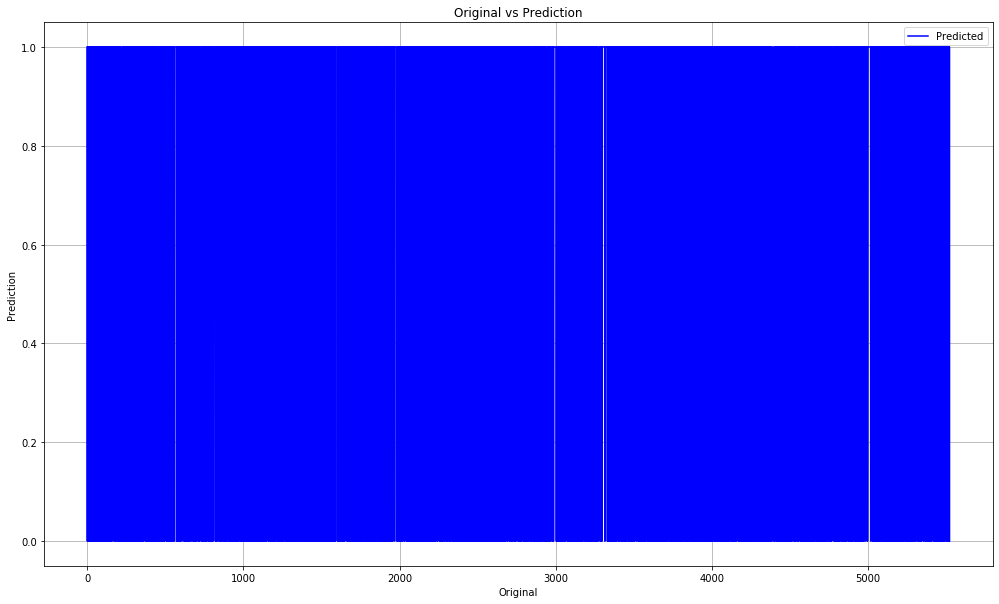

In [218]:
plt.figure(figsize=(17,10))
plt.plot(range(0,5523), p, 'r', label='Original')
plt.plot(range(0,5523), q, 'b', label='Predicted')
plt.title('Original vs Prediction')
plt.xlabel('Original')
plt.ylabel('Prediction')
plt.legend(loc=1)
plt.grid()
plt.show()

In [0]:
#Model 6H8N with dropouts
def get_dropout_compiled_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(8, activation='relu', ),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=RMSprop(lr=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'],
                  verbose=1,
                  callbacks = [callback]
                  ) 
    
    return model

In [152]:
droput_model = get_dropout_compiled_model()

droput_history = droput_model.fit(x=train_dataset,
                    validation_data=val_dataset,
                    epochs=10)

Epoch 1/10
25776/25776 [==============================] - 165s 6ms/step - loss: 0.5405 - accuracy: 0.7566 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
25776/25776 [==============================] - 109s 4ms/step - loss: 0.5806 - accuracy: 0.7580 - val_loss: 0.4649 - val_accuracy: 0.7531
Epoch 3/10
25776/25776 [==============================] - 108s 4ms/step - loss: 0.5647 - accuracy: 0.7632 - val_loss: 0.4861 - val_accuracy: 0.7359
Epoch 4/10
25776/25776 [==============================] - 109s 4ms/step - loss: 0.5838 - accuracy: 0.7615 - val_loss: 0.4876 - val_accuracy: 0.7699
Epoch 5/10
25776/25776 [==============================] - 110s 4ms/step - loss: 0.5455 - accuracy: 0.7587 - val_loss: 0.5921 - val_accuracy: 0.7549
Epoch 6/10
25776/25776 [==============================] - 109s 4ms/step - loss: 0.6317 - accuracy: 0.7574 - val_loss: 0.5922 - val_accuracy: 0.7589
Epoch 7/10
25776/25776 [==============================] - 109s 4ms/step - loss: 0.5893 - accuracy: 0.760

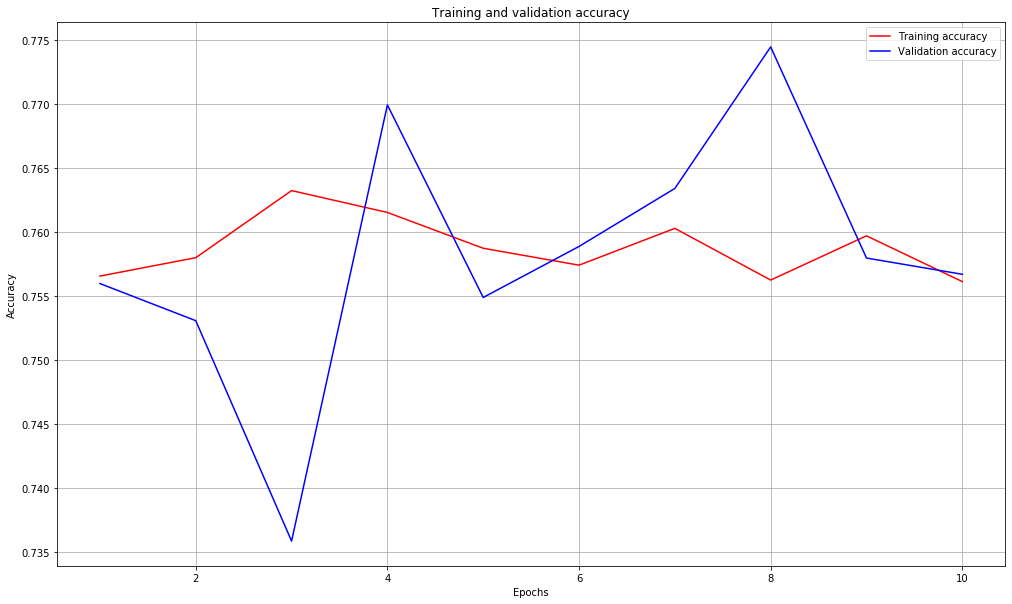

In [153]:
acc = droput_history.history['accuracy']
val_acc = droput_history.history['val_accuracy']
epochs = range(len(acc))
plt.figure(figsize=(17,10))
plt.plot(range(1,11), acc, 'r', label='Training accuracy')
plt.plot(range(1,11), val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.grid()
plt.show()

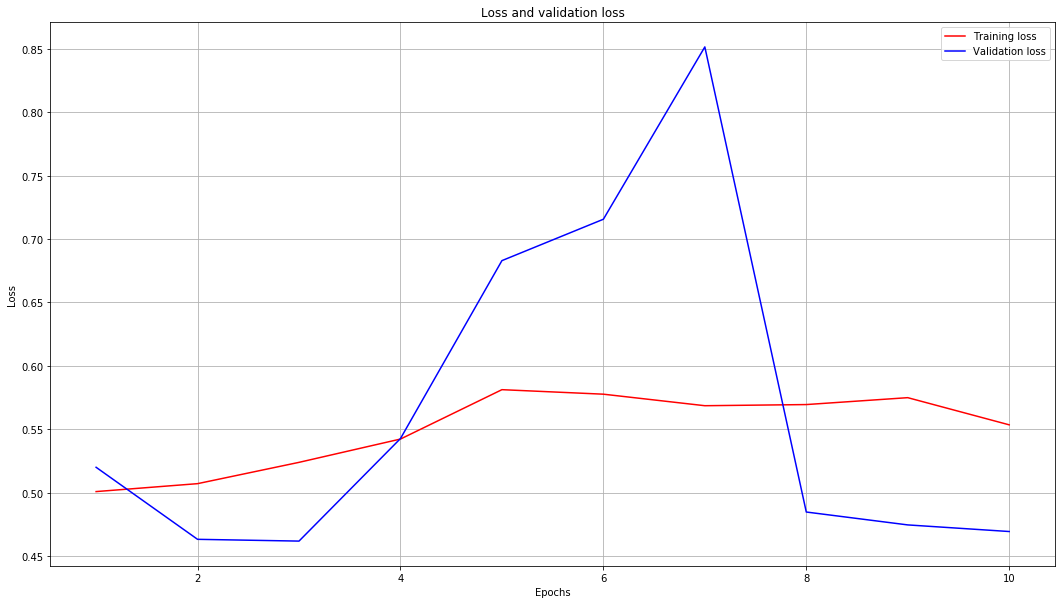

In [155]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(18,10))
plt.plot(range(1,11), loss, 'r', label='Training loss')
plt.plot(range(1,11), val_loss, 'b', label='Validation loss')
plt.title('Loss and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=1)
plt.grid()
plt.show()

In [154]:
print(droput_model.layers)
print(droput_model.summary())
print(droput_model.outputs)
print(droput_model.inputs)

[<tensorflow.python.keras.layers.core.Dense object at 0x7fc6182d2978>, <tensorflow.python.keras.layers.core.Dense object at 0x7fc617250b70>, <tensorflow.python.keras.layers.core.Dropout object at 0x7fc6172446a0>, <tensorflow.python.keras.layers.core.Dense object at 0x7fc617244588>, <tensorflow.python.keras.layers.core.Dropout object at 0x7fc6172443c8>, <tensorflow.python.keras.layers.core.Dense object at 0x7fc617244390>, <tensorflow.python.keras.layers.core.Dropout object at 0x7fc6172441d0>, <tensorflow.python.keras.layers.core.Dense object at 0x7fc6172440b8>, <tensorflow.python.keras.layers.core.Dropout object at 0x7fc617244780>, <tensorflow.python.keras.layers.core.Dense object at 0x7fc617244cf8>, <tensorflow.python.keras.layers.core.Dense object at 0x7fc617244e48>]
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             multiple                  64        


# **TensorFlow Dataset API for GPU and TPU processing**

<br> <br> <br> 
**Load Data frame and Make Tensor**

In [0]:
data_slices = tf.data.Dataset.from_tensor_slices(dict(df))
for feature_batch in data_slices.take(1):
  for key, value in feature_batch.items():
    print("  {!r:20s}: {}".format(key, value))

**Load CSV data and create a tensor**

In [0]:
def get_dataset(file_path, **kwargs):
  dataset = tf.data.experimental.make_csv_dataset(
      file_path,
      batch_size=5, # Artificially small to make examples easier to show.
      label_name="LABEL",
      na_value="?",
      num_epochs=1,
      ignore_errors=True, 
      **kwargs)
  return dataset

raw_train_data = get_dataset("/content/BigData.csv")

In [0]:
def show_batch(dataset):
  for batch, label in dataset.take(1):
    for key, value in batch.items():
      print("{:20s}: {}".format(key,value.numpy()))

show_batch(raw_train_data)

<br><br><br><br><br>

In [0]:
processed_df, counter = applyAlgorithms(dataframe=df,algorithms=algos,column_list=cols)

In [0]:
# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# !unzip ngrok-stable-linux-amd64.zip

# !pip install tensorboardcolab
# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# !unzip ngrok-stable-linux-amd64.zip



# LOG_DIR = './log'
# get_ipython().system_raw('tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'.format(LOG_DIR))
# get_ipython().system_raw('./ngrok http 6006 &')

# ! curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"